In [1]:
import sqlalchemy
import sqlite3

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# engine = sqlalchemy.create_engine('sqlite:///mental_health.sqlite')
con = sqlite3.connect("mental_health.sqlite")

# load prev installed sql module
%load_ext sql
%sql sqlite:///mental_health.sqlite

In [7]:
%%sql

DROP VIEW IF EXISTS AnswerTechEmployer;
CREATE VIEW AnswerTechEmployer AS
SELECT CAST(Answer.AnswerText AS int) AS TechEmployerAnswer, Answer.UserID
FROM Question JOIN Answer ON (Question.QuestionID=Answer.QuestionID)
WHERE Question.questiontext="Is your employer primarily a tech company/organization?";

DROP VIEW IF EXISTS YesTechEmployer;
CREATE VIEW YesTechEmployer AS
SELECT UserID
FROM AnswerTechEmployer
WHERE TechEmployerAnswer=1;

 * sqlite:///mental_health.sqlite
Done.
Done.
Done.
Done.


[]

In [8]:
%%sql

SELECT * FROM YesTechEmployer
LIMIT 10

 * sqlite:///mental_health.sqlite
Done.


UserID
1
3
4
5
6
7
8
9
10
11


In [66]:
# for employees of tech companies/organizations, how easy it is to take a medical leave for a mental health condition
df_query1 = pd.read_sql_query("""
    SELECT QuestionText AS 'Question', AnswerText AS 'Answer', count(AnswerText) AS 'Number of Responses' 
    FROM Question JOIN Answer ON (Question.QuestionID=Answer.QuestionID)
    WHERE Question.QuestionText IN 
        ("How easy is it for you to take medical leave for a mental health condition?")
        AND Answer.UserID IN (SELECT * FROM YesTechEmployer)
    GROUP BY Answer.AnswerText
    ORDER BY count(AnswerText) DESC
    """, con)

df_query1

,Question,Answer,Number of Responses
0,How easy is it for you to take medical leave f...,Don't know,456
1,How easy is it for you to take medical leave f...,Somewhat easy,219
2,How easy is it for you to take medical leave f...,Very easy,179
3,How easy is it for you to take medical leave f...,Somewhat difficult,98
4,How easy is it for you to take medical leave f...,Very difficult,79


Text(0.5,1,'As an employee of a tech company, how easy to take medical leave for a mental health condition?')

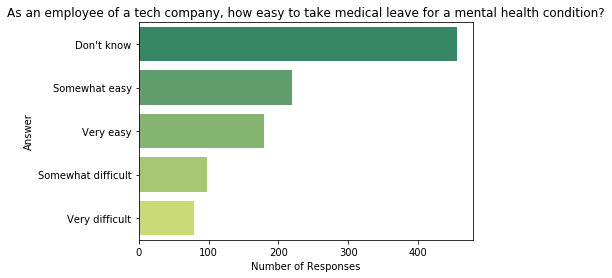

In [67]:
plot_query1 = sns.barplot('Number of Responses', 'Answer', data=df_query1, palette="summer")
plot_query1.set_title("As an employee of a tech company, how easy to take medical leave for a mental health condition?")

In [64]:
df_query1b = pd.read_sql_query("""
    SELECT AnswerText, TechEmployerAnswer, count(AnswerText) AS Count
    FROM Question JOIN Answer ON (Question.QuestionID=Answer.QuestionID)
        JOIN AnswerTechEmployer ON (AnswerTechEmployer.UserID=Answer.UserID)
    WHERE Question.QuestionText IN 
            ("How easy is it for you to take medical leave for a mental health condition?")
    GROUP BY AnswerText, TechEmployerAnswer
    HAVING Count>10
    ORDER BY Count DESC
    """, con)

df_query1b

,AnswerText,TechEmployerAnswer,Count
0,Don't know,1,456
1,Somewhat easy,1,219
2,Very easy,1,179
3,Don't know,0,108
4,Somewhat difficult,1,98
5,Very difficult,1,79
6,Somewhat easy,0,47
7,Somewhat difficult,0,28
8,Very easy,0,27
9,Very difficult,0,19


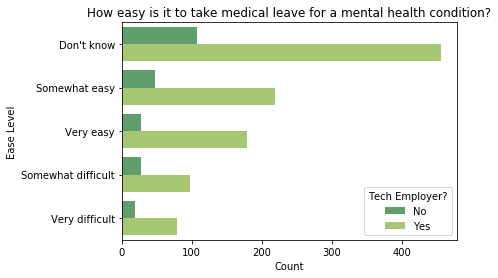

In [72]:
plot_query1b = sns.barplot('Count', 'AnswerText', hue='TechEmployerAnswer', data=df_query1b, palette="summer")

plot_query1b.set_title("How easy is it to take medical leave for a mental health condition?")
plot_query1b.set_ylabel('Ease Level')
# change legend
legend = plot_query1b.get_legend()
legend.set_title('Tech Employer?')
labels = ['No', 'Yes']
for t, l in zip(legend.texts, labels): t.set_text(l)

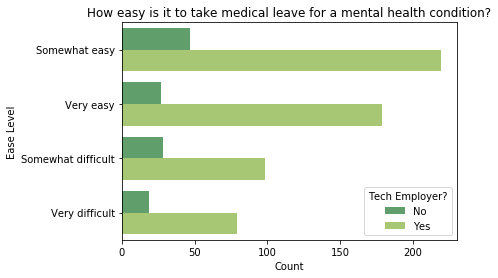

In [69]:
df_query1c = df_query1b[df_query1b['AnswerText'] != 'Don\'t know']

plot_query1c = sns.barplot('Count', 'AnswerText', hue='TechEmployerAnswer', data=df_query1c, palette="summer")

plot_query1c.set_title("How easy is it to take medical leave for a mental health condition?")
plot_query1c.set_ylabel('Ease Level')
# change legend
legend = plot_query1c.get_legend()
legend.set_title('Tech Employer?')
labels = ['No', 'Yes']
for t, l in zip(legend.texts, labels): t.set_text(l)

In [92]:
# for employees of tech companies/organizations, 
#     do you think discussing a mental health issue with your employer would have negative consequences?
df_query2 = pd.read_sql_query("""
    SELECT QuestionText AS 'Question', AnswerText AS 'Answer', count(AnswerText) AS 'Number of Responses' 
    FROM Question JOIN Answer ON (Question.QuestionID=Answer.QuestionID)
    WHERE Question.QuestionText IN 
            ("Do you think that discussing a mental health issue with your employer would have negative consequences?")
        AND Answer.UserID IN (SELECT * FROM YesTechEmployer)
    GROUP BY Answer.AnswerText
    """, con)

df_query2

,Question,Answer,Number of Responses
0,Do you think that discussing a mental health i...,Maybe,376
1,Do you think that discussing a mental health i...,No,430
2,Do you think that discussing a mental health i...,Yes,225


Text(0.5,1,'Do you think discussing mental health issues with your tech employer would have negative consequences?')

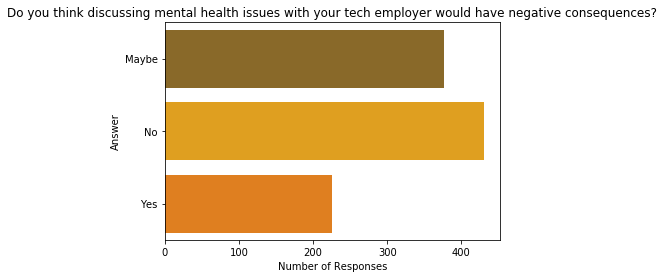

In [94]:
plot_query2 = sns.barplot('Number of Responses', 'Answer', data=df_query2, palette="autumn_d")
plot_query2.set_title("Do you think discussing mental health issues with your tech employer would have negative consequences?")